In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

In [2]:
import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus']= False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname = path, size = 50).get_name()
plt.rc('font', family=font_name)

In [4]:
df = pd.read_csv('./sample/상가업소정보_201912_01.csv', sep='|')
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
2,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711
3,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,...,2653010400105780000002037,산업용품유통상가,부산광역시 사상구 괘감로 37,617726,46977.0,NaN,1,26,128.980455,35.159774
4,19932756,가락사우나내스낵,NaN,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,S96121,...,1171010500102560005010490,NaN,서울특별시 송파구 가락로 71,138846,5690.0,NaN,1,NaN,127.104071,37.500249


In [5]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [6]:
df.index

RangeIndex(start=0, stop=573680, step=1)

In [7]:
df.shape

(573680, 39)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

In [9]:
df.isnull()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573675,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,True,True,True,False,False
573676,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
573677,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
573678,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False


In [10]:
df.isnull().sum()

상가업소번호            0
상호명               1
지점명          497006
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      34390
표준산업분류명       34390
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         98756
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        501692
건물관리번호            0
건물명          308072
도로명주소             0
구우편번호             0
신우편번호             9
동정보          522824
층정보          226553
호정보          488414
경도                0
위도                0
dtype: int64

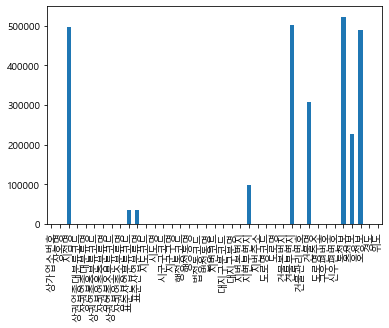

In [11]:
df.isnull().sum().plot(kind='bar')

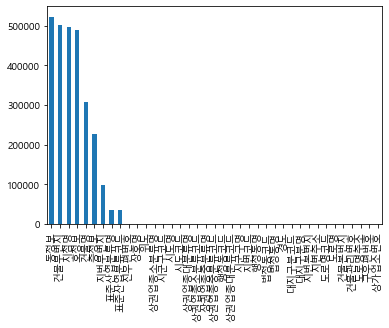

In [13]:
df.isnull().sum().sort_values(ascending=False).plot(kind='bar')

In [14]:
# anaconda prompt: conda install missingno / pip install missingno

In [15]:
import missingno as msno

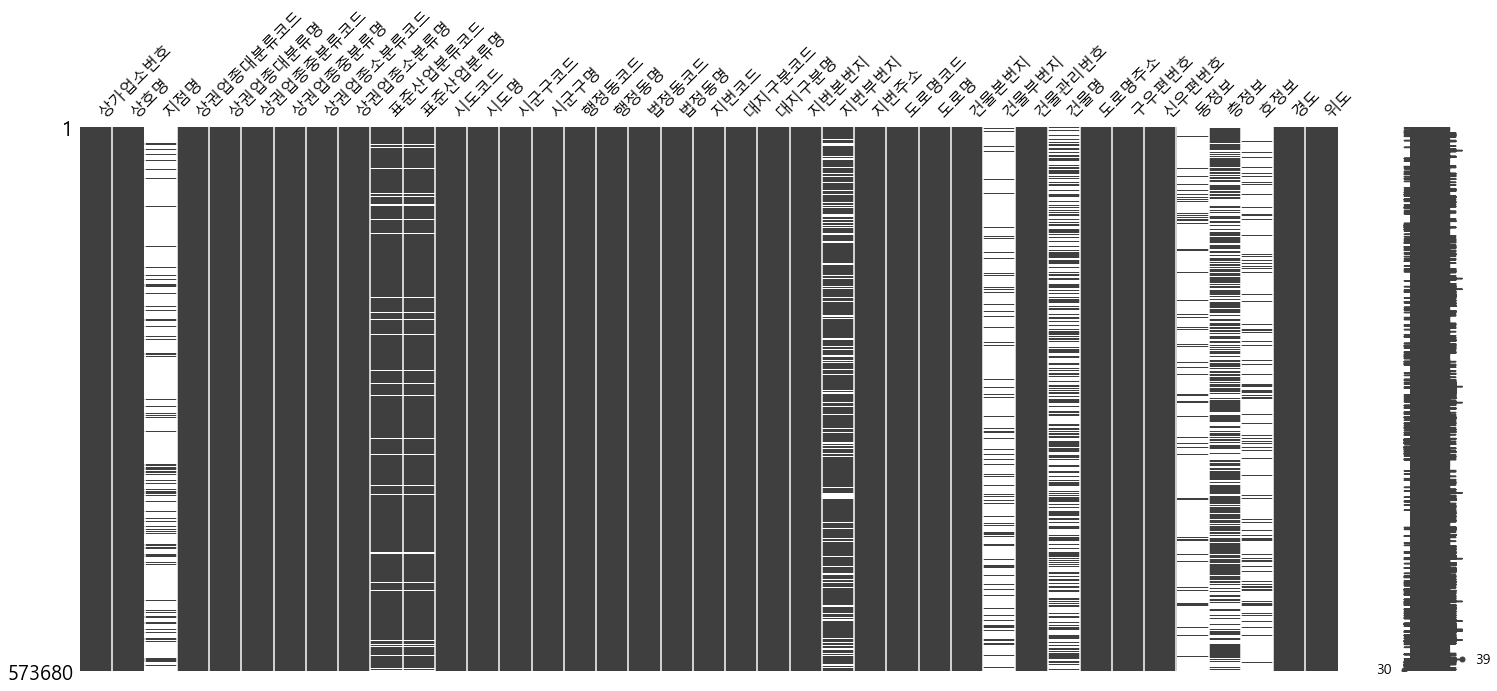

In [16]:
msno.matrix(df) # 널값이 얼마나 많은지 흰색으로 시각화해서 보여줌

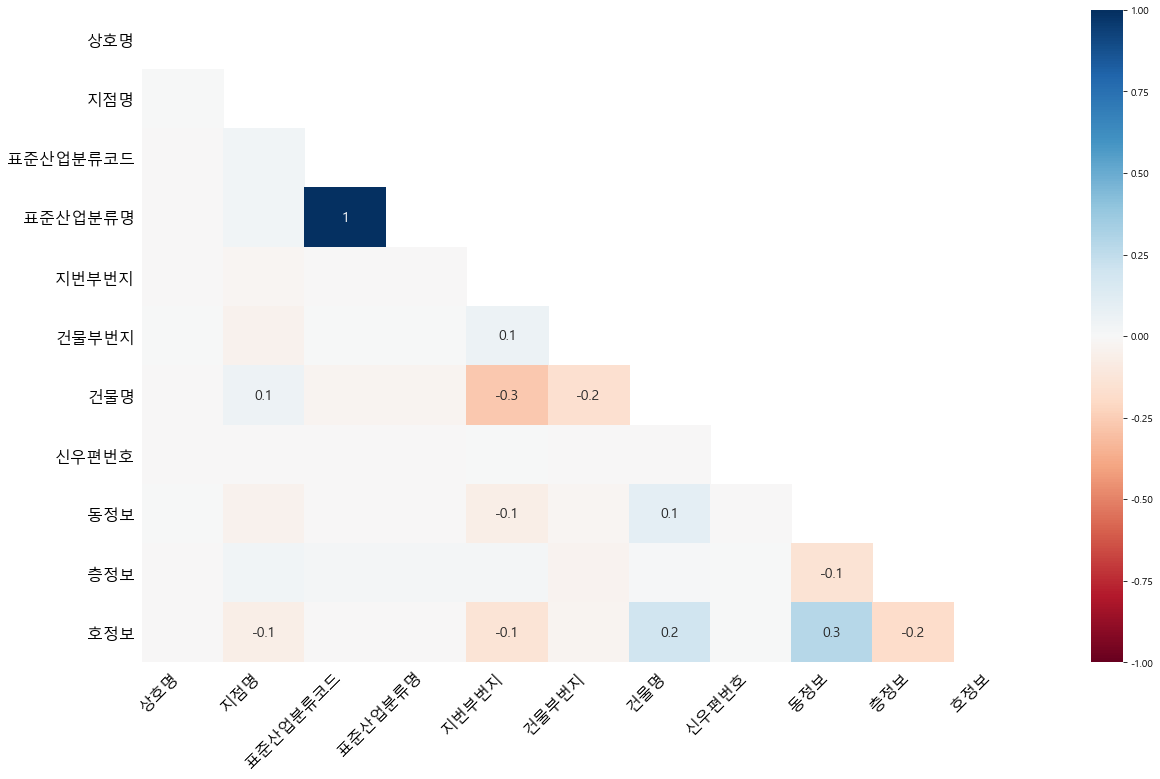

In [17]:
msno.heatmap(df) # 상관관계를 보여줌

In [21]:
not_use = df.isnull().sum().sort_values(ascending=False).head(9)
not_use_col = not_use.index
not_use_col

Index(['동정보', '건물부번지', '지점명', '호정보', '건물명', '층정보', '지번부번지', '표준산업분류명',
       '표준산업분류코드'],
      dtype='object')

In [23]:
print(df.shape)

(573680, 39)


In [25]:
df = df.drop(not_use_col, axis=1)
print(df.shape)

(573680, 30)


In [26]:
df.head(2)

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
0,19905471,와라와라호프,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,11,서울특별시,...,서울특별시 강남구 대치동 604,116802000003,서울특별시 강남구 남부순환로,2933,1168010600106040000014378,서울특별시 강남구 남부순환로 2933,135280,6280.0,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,11,서울특별시,...,서울특별시 강남구 역삼동 696-42,116804166502,서울특별시 강남구 선릉로93길,6,1168010100106960042022041,서울특별시 강남구 선릉로93길 6,135080,6149.0,127.047883,37.505675


In [28]:
cols = df.columns
cols

Index(['상가업소번호', '상호명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드', '상권업종중분류명',
       '상권업종소분류코드', '상권업종소분류명', '시도코드', '시도명', '시군구코드', '시군구명', '행정동코드',
       '행정동명', '법정동코드', '법정동명', '지번코드', '대지구분코드', '대지구분명', '지번본번지', '지번주소',
       '도로명코드', '도로명', '건물본번지', '건물관리번호', '도로명주소', '구우편번호', '신우편번호', '경도',
       '위도'],
      dtype='object')

In [30]:
cols.str.contains('코드|번호') # 코드나 번호가 들어간 칼럼은 참으로 반환

array([ True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True,  True,
       False, False, False,  True, False, False,  True, False,  True,
        True, False, False])

In [33]:
cols_code = cols[cols.str.contains('코드|번호')]
print(df.shape)

(573680, 30)


In [34]:
df = df.drop(cols_code, axis=1)
print(df.shape)

(573680, 16)


In [35]:
df.head(2)

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,대지,604,서울특별시 강남구 대치동 604,서울특별시 강남구 남부순환로,2933,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,대지,696,서울특별시 강남구 역삼동 696-42,서울특별시 강남구 선릉로93길,6,서울특별시 강남구 선릉로93길 6,127.047883,37.505675


In [36]:
df['상호명']

0                와라와라호프
1         커피빈코리아선릉로93길점
2                  프로포즈
3              싱싱커피&토스트
4              가락사우나내스낵
              ...      
573675          비파티세리공덕
573676            앤탑PC방
573677         오즈아레나PC방
573678           파인트리네일
573679           마이리틀네일
Name: 상호명, Length: 573680, dtype: object

In [37]:
# 칼럼추출하는 방법
df[['상호명', '도로명주소']]

,상호명,도로명주소
0,와라와라호프,서울특별시 강남구 남부순환로 2933
1,커피빈코리아선릉로93길점,서울특별시 강남구 선릉로93길 6
2,프로포즈,서울특별시 금천구 가산로 34-6
3,싱싱커피&토스트,부산광역시 사상구 괘감로 37
4,가락사우나내스낵,서울특별시 송파구 가락로 71
...,...,...
573675,비파티세리공덕,서울특별시 마포구 마포대로14길 4
573676,앤탑PC방,서울특별시 성동구 성수일로8길 37
573677,오즈아레나PC방,서울특별시 강남구 강남대로 492
573678,파인트리네일,서울특별시 영등포구 국제금융로 10


In [38]:
# 행추출시 loc[인덱스명], iloc[인덱스순번]
# 행과 열 함께 추출 df.iloc[행순번, 열순번], df.loc[행이름, 열이름]

In [39]:
df.iloc[0]

상호명                       와라와라호프
상권업종대분류명                      음식
상권업종중분류명                    유흥주점
상권업종소분류명                   호프/맥주
시도명                        서울특별시
시군구명                         강남구
행정동명                        대치1동
법정동명                         대치동
대지구분명                         대지
지번본번지                        604
지번주소           서울특별시 강남구 대치동 604
도로명              서울특별시 강남구 남부순환로
건물본번지                       2933
도로명주소       서울특별시 강남구 남부순환로 2933
경도                       127.061
위도                       37.4939
Name: 0, dtype: object

In [40]:
df.iloc[[0,2,4]]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,대지,604,서울특별시 강남구 대치동 604,서울특별시 강남구 남부순환로,2933,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,대지,162,서울특별시 금천구 독산동 162-1,서울특별시 금천구 가산로,34,서울특별시 금천구 가산로 34-6,126.899220,37.471711
4,가락사우나내스낵,생활서비스,대중목욕탕/휴게,사우나/증기탕/온천,서울특별시,송파구,석촌동,석촌동,대지,256,서울특별시 송파구 석촌동 256,서울특별시 송파구 가락로,71,서울특별시 송파구 가락로 71,127.104071,37.500249


In [41]:
df.loc[0, '상호명']

'와라와라호프'

In [42]:
df.loc[[0,2,4], ['상호명', '도로명주소']]

,상호명,도로명주소
0,와라와라호프,서울특별시 강남구 남부순환로 2933
2,프로포즈,서울특별시 금천구 가산로 34-6
4,가락사우나내스낵,서울특별시 송파구 가락로 71


In [43]:
df['위도'].mean()

36.85469787421801

In [44]:
df['위도'].max()

37.69239838166121

In [45]:
df['위도'].min()

35.0067597383124

In [46]:
df['위도'].sum()

21142803.076482903

In [47]:
df['위도'].median()

37.5112070048312

In [48]:
df['위도'].std()

1.0812845231395738

In [49]:
df['위도'].var()

1.1691762199811755

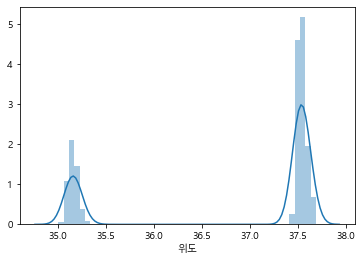

In [52]:
sns.distplot(df['위도'])

In [53]:
df.corr()

,지번본번지,건물본번지,경도,위도
지번본번지,1.000000,0.057987,0.182678,-0.196658
건물본번지,0.057987,1.000000,0.000255,0.004606
경도,0.182678,0.000255,1.000000,-0.994711
위도,-0.196658,0.004606,-0.994711,1.000000


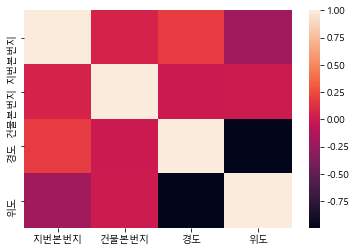

In [54]:
sns.heatmap(df.corr())

In [55]:
df['상권업종대분류명'].unique()

array(['음식', '생활서비스', '소매', '의료', '학문/교육', '관광/여가/오락', '부동산', '숙박', '스포츠'],
      dtype=object)

In [56]:
df['상권업종중분류명'].unique()

array(['유흥주점', '커피점/카페', '패스트푸드', '대중목욕탕/휴게', '일식/수산물', '분식', '한식',
       '음/식료품소매', '건강/미용식품', '선물/팬시/기념품', '양식', '중식', '종합소매점', '병원',
       '화장품소매', '학원-어학', '의복의류', 'PC/오락/당구/볼링등', '별식/퓨전요리', '학원-자격/국가고시',
       '도서관/독서실', '가정/주방/인테리어', '학원-음악미술무용', '무도/유흥/가무', '이/미용/건강',
       '사진/광학/정밀기기소매', '세탁/가사서비스', '닭/오리요리', '책/서적/도서', '예식/의례/관혼상제',
       '광고/인쇄', '학원-예능취미체육', '운송/배달/택배', '기타음식업', '부동산중개', '주유소/충전소',
       '철물/난방/건설자재소매', '유아교육', '주택수리', '사무/문구/컴퓨터', '약국/한약방', '물품기기대여',
       '자동차/이륜차', '자동차/자동차용품', '가구소매', '개인/가정용품수리', '학원-보습교습입시', '기타판매업',
       '유사의료업', '학원기타', '개인서비스', '시계/귀금속소매', '사진', '요가/단전/마사지', '학문교육기타',
       '가방/신발/액세서리', '대행업', '페인트/유리제품소매', '중고품소매/교환', '인력/고용/용역알선',
       '애견/애완/동물', '음식배달서비스', '가전제품소매', '유아용품', '학원-컴퓨터', '기타서비스업',
       '운동/경기용품소매', '장례/묘지', '법무세무회계', '취미/오락관련소매', '연극/영화/극장',
       '평가/개발/관리', '수의업', '호텔/콘도', '모텔/여관/여인숙', '분양', '제과제빵떡케익',
       '학원-창업취업취미', '의약/의료품소매', '행사/이벤트', '경마/경륜/성인오락', '예술품/골동품/수석/분재',
       '부페', '의료관련서비스업'

In [57]:
# 대업종의 빈도수를 구하려면

In [58]:
df['상권업종대분류명'].value_counts()

음식          185516
소매          179460
생활서비스        97789
학문/교육        42477
의료           25509
부동산          20918
관광/여가/오락     16377
숙박            5327
스포츠            307
Name: 상권업종대분류명, dtype: int64

In [59]:
df_food = df[df['상권업종대분류명'] == '음식'].copy()
df_food

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,대지,604,서울특별시 강남구 대치동 604,서울특별시 강남구 남부순환로,2933,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,대지,696,서울특별시 강남구 역삼동 696-42,서울특별시 강남구 선릉로93길,6,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,대지,162,서울특별시 금천구 독산동 162-1,서울특별시 금천구 가산로,34,서울특별시 금천구 가산로 34-6,126.899220,37.471711
3,싱싱커피&토스트,음식,패스트푸드,토스트전문,부산광역시,사상구,괘법동,괘법동,대지,578,부산광역시 사상구 괘법동 578,부산광역시 사상구 괘감로,37,부산광역시 사상구 괘감로 37,128.980455,35.159774
5,초밥왕,음식,일식/수산물,음식점-초밥전문,서울특별시,송파구,잠실6동,신천동,대지,7,서울특별시 송파구 신천동 7-28,서울특별시 송파구 올림픽로,293,서울특별시 송파구 올림픽로 293-19,127.102490,37.515149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573658,브레드앤로즈,음식,제과제빵떡케익,제과점,서울특별시,성동구,성수1가1동,성수동1가,대지,685,서울특별시 성동구 성수동1가 685-704,서울특별시 성동구 왕십리로,63,서울특별시 성동구 왕십리로 63,127.043565,37.543610
573669,스테프핫도그,음식,패스트푸드,패스트푸드,서울특별시,마포구,도화동,마포동,대지,418,서울특별시 마포구 마포동 418-1,서울특별시 마포구 마포대로4다길,41,서울특별시 마포구 마포대로4다길 41,126.943989,37.535121
573670,평창갈비,음식,한식,갈비/삼겹살,서울특별시,송파구,방이1동,방이동,대지,165,서울특별시 송파구 방이동 165-3,서울특별시 송파구 위례성대로,98,서울특별시 송파구 위례성대로 98,127.122565,37.513543
573671,휴돈정,음식,양식,돈가스전문점,서울특별시,노원구,공릉1동,공릉동,대지,383,서울특별시 노원구 공릉동 383-12,서울특별시 노원구 동일로191가길,6,서울특별시 노원구 동일로191가길 6,127.071622,37.625316


In [61]:
df[df['시군구명'] == '강남구']

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,대지,604,서울특별시 강남구 대치동 604,서울특별시 강남구 남부순환로,2933,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,대지,696,서울특별시 강남구 역삼동 696-42,서울특별시 강남구 선릉로93길,6,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
26,쉼터,음식,분식,라면김밥분식,서울특별시,강남구,삼성1동,삼성동,대지,159,서울특별시 강남구 삼성동 159,서울특별시 강남구 봉은사로,524,서울특별시 강남구 봉은사로 524,127.057100,37.512939
27,배제현의웰빙낙지한마리수제비,음식,일식/수산물,낙지/오징어,서울특별시,강남구,신사동,신사동,대지,512,서울특별시 강남구 신사동 512-13,서울특별시 강남구 강남대로152길,19,서울특별시 강남구 강남대로152길 19,127.020945,37.517574
38,타워광명내과의원,의료,병원,내과/외과,서울특별시,강남구,도곡2동,도곡동,대지,467,서울특별시 강남구 도곡동 467-14,서울특별시 강남구 언주로30길,39,서울특별시 강남구 언주로30길 39,127.053198,37.488742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573668,킹덤코리아,소매,음/식료품소매,청과물소매,서울특별시,강남구,역삼2동,역삼동,대지,720,서울특별시 강남구 역삼동 720-9,서울특별시 강남구 테헤란로38길,5,서울특별시 강남구 테헤란로38길 5,127.041635,37.501642
573672,심스틸러,소매,의복의류,캐쥬얼/스포츠의류,서울특별시,강남구,논현1동,논현동,대지,16,서울특별시 강남구 논현동 16-40,서울특별시 강남구 강남대로146길,7,서울특별시 강남구 강남대로146길 7,127.020698,37.514833
573673,밀리온골프,소매,의복의류,캐쥬얼/스포츠의류,서울특별시,강남구,압구정동,신사동,대지,648,서울특별시 강남구 신사동 648-8,서울특별시 강남구 도산대로49길,21,서울특별시 강남구 도산대로49길 21,127.036900,37.524247
573674,헤리티크뉴욕,소매,의복의류,예복/웨딩드레스,서울특별시,강남구,압구정동,신사동,대지,650,서울특별시 강남구 신사동 650-7,서울특별시 강남구 도산대로45길,16,서울특별시 강남구 도산대로45길 16-9,127.036036,37.523645


In [62]:
df[(df['상권업종대분류명'] == '음식') & (df['시군구명'] == '강남구')]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,대지,604,서울특별시 강남구 대치동 604,서울특별시 강남구 남부순환로,2933,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,대지,696,서울특별시 강남구 역삼동 696-42,서울특별시 강남구 선릉로93길,6,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
26,쉼터,음식,분식,라면김밥분식,서울특별시,강남구,삼성1동,삼성동,대지,159,서울특별시 강남구 삼성동 159,서울특별시 강남구 봉은사로,524,서울특별시 강남구 봉은사로 524,127.057100,37.512939
27,배제현의웰빙낙지한마리수제비,음식,일식/수산물,낙지/오징어,서울특별시,강남구,신사동,신사동,대지,512,서울특별시 강남구 신사동 512-13,서울특별시 강남구 강남대로152길,19,서울특별시 강남구 강남대로152길 19,127.020945,37.517574
39,마깐바냑,음식,분식,라면김밥분식,서울특별시,강남구,역삼1동,역삼동,대지,831,서울특별시 강남구 역삼동 831-45,서울특별시 강남구 역삼로,109,서울특별시 강남구 역삼로 109,127.031005,37.493653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573504,강남농수산,음식,일식/수산물,음식점-일식,서울특별시,강남구,세곡동,율현동,대지,108,서울특별시 강남구 율현동 108-9,서울특별시 강남구 헌릉로745길,25,서울특별시 강남구 헌릉로745길 25,127.119159,37.469284
573521,풍,음식,일식/수산물,음식점-일식,서울특별시,강남구,논현1동,논현동,대지,183,서울특별시 강남구 논현동 183-4,서울특별시 강남구 강남대로118길,20,서울특별시 강남구 강남대로118길 20,127.025047,37.506579
573545,올드캡,음식,패스트푸드,패스트푸드,서울특별시,강남구,논현2동,논현동,대지,234,서울특별시 강남구 논현동 234-2,서울특별시 강남구 논현로114길,10,서울특별시 강남구 논현로114길 10,127.034194,37.508564
573554,흑화당,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,대치2동,대치동,대지,989,서울특별시 강남구 대치동 989,서울특별시 강남구 삼성로,238,서울특별시 강남구 삼성로 238,127.061386,37.498629


In [65]:
df_seoul_food = df[(df['상권업종대분류명'] == '음식') & (df['시도명'] == '서울특별시')]
df_seoul_food

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,대지,604,서울특별시 강남구 대치동 604,서울특별시 강남구 남부순환로,2933,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,대지,696,서울특별시 강남구 역삼동 696-42,서울특별시 강남구 선릉로93길,6,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,대지,162,서울특별시 금천구 독산동 162-1,서울특별시 금천구 가산로,34,서울특별시 금천구 가산로 34-6,126.899220,37.471711
5,초밥왕,음식,일식/수산물,음식점-초밥전문,서울특별시,송파구,잠실6동,신천동,대지,7,서울특별시 송파구 신천동 7-28,서울특별시 송파구 올림픽로,293,서울특별시 송파구 올림픽로 293-19,127.102490,37.515149
6,석봉토스트,음식,패스트푸드,토스트전문,서울특별시,광진구,구의2동,구의동,대지,77,서울특별시 광진구 구의동 77-47,서울특별시 광진구 자양로39길,20,서울특별시 광진구 자양로39길 20,127.088387,37.549245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573658,브레드앤로즈,음식,제과제빵떡케익,제과점,서울특별시,성동구,성수1가1동,성수동1가,대지,685,서울특별시 성동구 성수동1가 685-704,서울특별시 성동구 왕십리로,63,서울특별시 성동구 왕십리로 63,127.043565,37.543610
573669,스테프핫도그,음식,패스트푸드,패스트푸드,서울특별시,마포구,도화동,마포동,대지,418,서울특별시 마포구 마포동 418-1,서울특별시 마포구 마포대로4다길,41,서울특별시 마포구 마포대로4다길 41,126.943989,37.535121
573670,평창갈비,음식,한식,갈비/삼겹살,서울특별시,송파구,방이1동,방이동,대지,165,서울특별시 송파구 방이동 165-3,서울특별시 송파구 위례성대로,98,서울특별시 송파구 위례성대로 98,127.122565,37.513543
573671,휴돈정,음식,양식,돈가스전문점,서울특별시,노원구,공릉1동,공릉동,대지,383,서울특별시 노원구 공릉동 383-12,서울특별시 노원구 동일로191가길,6,서울특별시 노원구 동일로191가길 6,127.071622,37.625316


In [67]:
# 서울시의 구별 각 중분류업종
food_gu = df_seoul_food.groupby(['시군구명', '상권업종중분류명'])['상호명'].count()
food_gu

시군구명  상권업종중분류명
강남구   기타음식업         47
      닭/오리요리       539
      별식/퓨전요리      341
      부페            63
      분식          1197
                  ... 
중랑구   제과제빵떡케익      160
      중식            78
      커피점/카페       311
      패스트푸드        127
      한식          1251
Name: 상호명, Length: 348, dtype: int64

In [68]:
food_gu.unstack()

상권업종중분류명,기타음식업,닭/오리요리,별식/퓨전요리,부페,분식,양식,유흥주점,음식배달서비스,일식/수산물,제과제빵떡케익,중식,커피점/카페,패스트푸드,한식
시군구명,,,,,,,,,,,,,,
강남구,47.0,539.0,341.0,63.0,1197.0,1573.0,1573.0,11.0,1255.0,650.0,358.0,2790.0,786.0,4371.0
강동구,4.0,318.0,138.0,24.0,509.0,154.0,737.0,4.0,379.0,223.0,93.0,584.0,224.0,1636.0
강북구,2.0,208.0,97.0,6.0,329.0,63.0,475.0,4.0,203.0,134.0,55.0,259.0,123.0,1209.0
강서구,16.0,323.0,145.0,21.0,531.0,260.0,869.0,2.0,441.0,256.0,126.0,765.0,259.0,1753.0
관악구,11.0,324.0,118.0,11.0,461.0,183.0,790.0,6.0,324.0,165.0,109.0,516.0,196.0,1336.0
광진구,11.0,453.0,188.0,25.0,655.0,275.0,1142.0,1.0,490.0,270.0,194.0,810.0,278.0,2020.0
구로구,6.0,289.0,121.0,23.0,429.0,97.0,691.0,6.0,282.0,169.0,226.0,551.0,180.0,1322.0
금천구,9.0,176.0,102.0,9.0,268.0,75.0,413.0,1.0,225.0,94.0,93.0,369.0,100.0,1003.0
노원구,10.0,345.0,99.0,12.0,476.0,132.0,482.0,6.0,300.0,239.0,95.0,547.0,259.0,1227.0


In [69]:
food_gu.unstack().iloc[:-10, :-10]

상권업종중분류명,기타음식업,닭/오리요리,별식/퓨전요리,부페
시군구명,,,,
강남구,47.0,539.0,341.0,63.0
강동구,4.0,318.0,138.0,24.0
강북구,2.0,208.0,97.0,6.0
강서구,16.0,323.0,145.0,21.0
관악구,11.0,324.0,118.0,11.0
광진구,11.0,453.0,188.0,25.0
구로구,6.0,289.0,121.0,23.0
금천구,9.0,176.0,102.0,9.0
노원구,10.0,345.0,99.0,12.0


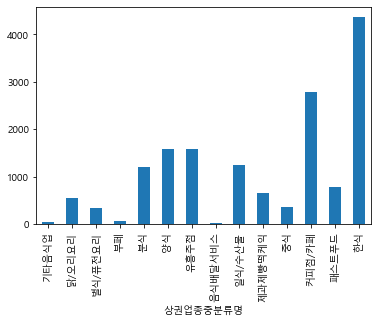

In [71]:
food_gu.unstack().loc['강남구'].plot(kind='bar')

In [72]:
# 서울 강남, 목동 상계동에 입시학원이 많이 분포하는지 확인

In [73]:
df['상권업종대분류명'].unique()

array(['음식', '생활서비스', '소매', '의료', '학문/교육', '관광/여가/오락', '부동산', '숙박', '스포츠'],
      dtype=object)

In [75]:
df_academy = df[(df['시도명'] == '서울특별시') & (df['상권업종대분류명'] == '학문/교육')]
df_academy.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
85,GIA보석교육원,학문/교육,학원-자격/국가고시,학원-보석감정,서울특별시,강남구,압구정동,신사동,대지,639,서울특별시 강남구 신사동 639-3,서울특별시 강남구 압구정로,320,서울특별시 강남구 압구정로 320,127.036437,37.528532
101,안재형영어,학문/교육,학원-어학,학원-외국어/어학,서울특별시,양천구,목5동,목동,대지,905,서울특별시 양천구 목동 905-34,서울특별시 양천구 목동서로,133,서울특별시 양천구 목동서로 133-2,126.875973,37.531592
121,정아트,학문/교육,학원-음악미술무용,서예/서화/미술,서울특별시,강서구,염창동,염창동,대지,184,서울특별시 강서구 염창동 184-8,서울특별시 강서구 양천로73가길,21,서울특별시 강서구 양천로73가길 21,126.873645,37.550924
126,경찰태권도,학문/교육,학원-예능취미체육,태권도장,서울특별시,성북구,길음1동,길음동,대지,1283,서울특별시 성북구 길음동 1283-4,서울특별시 성북구 길음로,20,서울특별시 성북구 길음로 20,127.023020,37.604749
134,아트인스튜디오,학문/교육,학원-음악미술무용,서예/서화/미술,서울특별시,강남구,역삼1동,역삼동,대지,818,서울특별시 강남구 역삼동 818-1,서울특별시 강남구 강남대로96길,12,서울특별시 강남구 강남대로96길 12,127.028054,37.499729


In [76]:
df_academy['시군구명'].value_counts()

강남구     4005
서초구     2103
양천구     1881
광진구     1848
송파구     1797
강동구     1585
노원구     1582
강서구     1498
은평구     1333
관악구     1313
성북구     1246
구로구     1140
동대문구    1051
동작구     1050
마포구     1007
영등포구     984
도봉구      931
중랑구      884
서대문구     773
성동구      742
금천구      701
종로구      638
강북구      513
용산구      491
중구       413
Name: 시군구명, dtype: int64

In [96]:
# 상뒤 30위 이내 추출
academy_count = df_academy['상권업종소분류명'].value_counts()[:30]
academy_count

학원-입시          7509
학원(종합)         4561
어린이집           4395
학원-외국어/어학      3544
피아노/바이올린/기타    2868
서예/서화/미술       1595
독서실            1096
고시원            1062
학원-기타           677
태권도장            610
학습지보급           430
학원-어린이영어        319
컴퓨터학원           270
학원-스포츠/재즈댄스     269
학원-무용           220
놀이방             139
학원-주산암산부기속셈     122
유아교육기관기타        107
학원-미용           106
학원-배우/탤런트       102
합기도장             96
검도도장             95
실내놀이터-유아         84
학원-요리            78
학원-간호조무사         76
학원/국가고시          70
학원-사교춤           54
유도장              49
학원-심리변론          46
학원-국악            45
Name: 상권업종소분류명, dtype: int64

In [97]:
# 빈도수가 1000개 이상인 걸로
academy_count_1000 = academy_count[academy_count > 1000]
academy_count_1000

학원-입시          7509
학원(종합)         4561
어린이집           4395
학원-외국어/어학      3544
피아노/바이올린/기타    2868
서예/서화/미술       1595
독서실            1096
고시원            1062
Name: 상권업종소분류명, dtype: int64

In [98]:
df_academy_selected = df_academy[df_academy['상권업종소분류명'].isin(academy_count_1000.index)].copy()
df_academy_selected

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
101,안재형영어,학문/교육,학원-어학,학원-외국어/어학,서울특별시,양천구,목5동,목동,대지,905,서울특별시 양천구 목동 905-34,서울특별시 양천구 목동서로,133,서울특별시 양천구 목동서로 133-2,126.875973,37.531592
121,정아트,학문/교육,학원-음악미술무용,서예/서화/미술,서울특별시,강서구,염창동,염창동,대지,184,서울특별시 강서구 염창동 184-8,서울특별시 강서구 양천로73가길,21,서울특별시 강서구 양천로73가길 21,126.873645,37.550924
134,아트인스튜디오,학문/교육,학원-음악미술무용,서예/서화/미술,서울특별시,강남구,역삼1동,역삼동,대지,818,서울특별시 강남구 역삼동 818-1,서울특별시 강남구 강남대로96길,12,서울특별시 강남구 강남대로96길 12,127.028054,37.499729
151,삼익피아노강동대리점,학문/교육,학원-음악미술무용,피아노/바이올린/기타,서울특별시,강동구,천호3동,천호동,대지,410,서울특별시 강동구 천호동 410-105,서울특별시 강동구 진황도로,18,서울특별시 강동구 진황도로 18,127.129075,37.539262
153,파랑새어린이집,학문/교육,유아교육,어린이집,서울특별시,도봉구,창1동,창동,대지,374,서울특별시 도봉구 창동 374,서울특별시 도봉구 덕릉로,329,서울특별시 도봉구 덕릉로 329,127.045486,37.644831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573529,쌤통수학교습소,학문/교육,학원-보습교습입시,학원-입시,서울특별시,서대문구,홍제2동,홍제동,대지,106,서울특별시 서대문구 홍제동 106,서울특별시 서대문구 통일로34길,24,서울특별시 서대문구 통일로34길 24,126.949389,37.585709
573654,골든벨독서실,학문/교육,도서관/독서실,독서실,서울특별시,양천구,신월2동,신월동,대지,447,서울특별시 양천구 신월동 447-5,서울특별시 양천구 월정로,56,서울특별시 양천구 월정로 56,126.841706,37.524719
573656,에이디링크연구소,학문/교육,학원기타,학원(종합),서울특별시,송파구,가락본동,가락동,대지,76,서울특별시 송파구 가락동 76,서울특별시 송파구 양재대로62길,47,서울특별시 송파구 양재대로62길 47,127.120757,37.495986
573661,도무스링구아,학문/교육,학원-보습교습입시,학원-입시,서울특별시,서초구,양재1동,우면동,대지,721,서울특별시 서초구 우면동 721-1,서울특별시 서초구 태봉로,70,서울특별시 서초구 태봉로 70,127.025571,37.464531


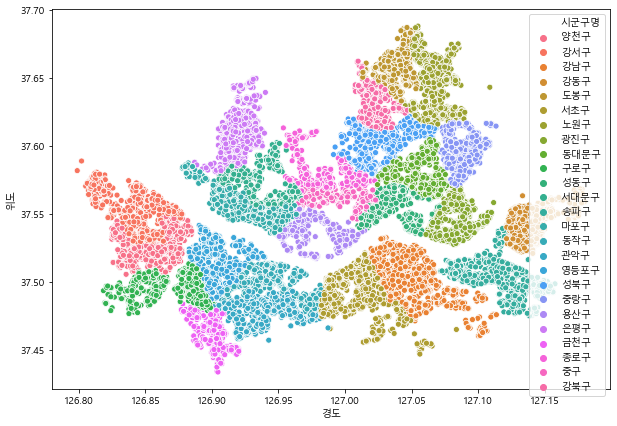

In [100]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df_academy_selected, x='경도', y='위도', hue='시군구명')

In [86]:
df_ibsi = df_academy[df_academy['상권업종소분류명'].str.contains('학원-입시')].copy()
df_ibsi.head() # 서울시의 소분류업종 입시학원의 데이터

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
173,이엠학원,학문/교육,학원-보습교습입시,학원-입시,서울특별시,광진구,군자동,군자동,대지,48,서울특별시 광진구 군자동 48-24,서울특별시 광진구 군자로,141,서울특별시 광진구 군자로 141,127.074812,37.554303
195,삼성수학,학문/교육,학원-보습교습입시,학원-입시,서울특별시,강남구,대치2동,대치동,대지,975,서울특별시 강남구 대치동 975-16,서울특별시 강남구 삼성로64길,27,서울특별시 강남구 삼성로64길 27,127.062607,37.500441
232,왕수학이화학원,학문/교육,학원-보습교습입시,학원-입시,서울특별시,동대문구,청량리동,청량리동,대지,205,서울특별시 동대문구 청량리동 205-562,서울특별시 동대문구 회기로8길,42,서울특별시 동대문구 회기로8길 42,127.041342,37.590807
260,약수학원,학문/교육,학원-보습교습입시,학원-입시,서울특별시,도봉구,방학3동,방학동,대지,446,서울특별시 도봉구 방학동 446-13,서울특별시 도봉구 시루봉로,130,서울특별시 도봉구 시루봉로 130,127.027727,37.662409
269,타임교육,학문/교육,학원-보습교습입시,학원-입시,서울특별시,양천구,목1동,목동,대지,408,서울특별시 양천구 목동 408-216,서울특별시 양천구 목동서로,258,서울특별시 양천구 목동서로 258,126.869156,37.524463


In [87]:
# 입시학원이 가장 많은 구

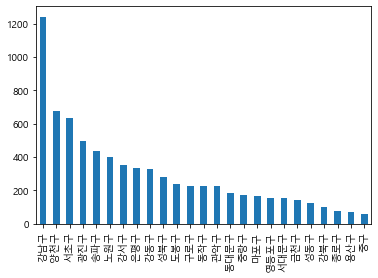

In [90]:
df_ibsi['시군구명'].value_counts().plot(kind='bar')

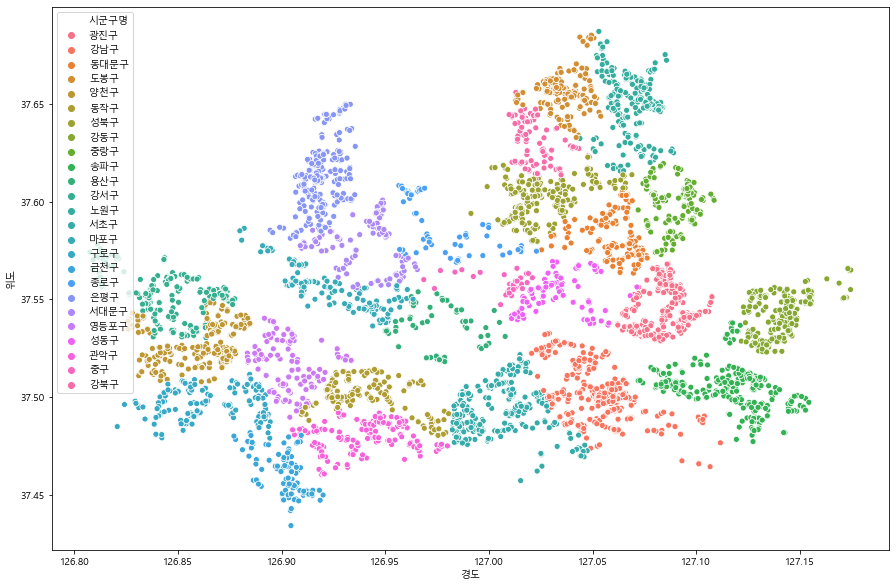

In [93]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df_ibsi, x='경도', y='위도', hue='시군구명')

In [94]:
# folium
# conda install folium
# pip install folium

In [101]:
import folium

In [103]:
long = df_academy_selected['위도'].mean()
long

37.544627646255

In [104]:
lat = df_academy_selected['경도'].mean()
lat

126.99795538192822

In [106]:
folium.Map(location=[long, lat])

In [109]:
df_m = df_academy_selected[df_academy_selected['상권업종소분류명'].isin(['어린이집', '학원-입시'])]
df_m = df_m.sample(1000)
df_m.shape

(1000, 16)

In [111]:
df_m.iloc[0]

상호명                      파스칼수학교습소
상권업종대분류명                    학문/교육
상권업종중분류명                학원-보습교습입시
상권업종소분류명                    학원-입시
시도명                         서울특별시
시군구명                          성북구
행정동명                          삼선동
법정동명                        삼선동3가
대지구분명                          대지
지번본번지                         106
지번주소        서울특별시 성북구 삼선동3가 106-2
도로명             서울특별시 성북구 보문로29다길
건물본번지                          12
도로명주소        서울특별시 성북구 보문로29다길 12
경도                        127.013
위도                        37.5851
Name: 212545, dtype: object

In [112]:
lat = df_m.iloc[0].경도
long = df_m.iloc[0].위도
title = df_m.iloc[0].상호명
address = df_m.iloc[0].도로명주소

In [113]:
print(title, lat, long, address)

파스칼수학교습소 127.01330108126601 37.58512489326571 서울특별시 성북구 보문로29다길 12


In [118]:
m = folium.Map(location=[long, lat])

folium.Marker(location=[long, lat], tooltip=title, popup='<i>{}</i>'.format(address)).add_to(m)
m

In [119]:
m.save('./index.html')

In [120]:
for i in df_m.index[:10]:
    tooltip = df_m.loc[i, '상호명'] + "-" + df_m.loc[i, '도로명주소']
    lat = df_m.loc[i, '위도']
    long = df_m.loc[i, '경도']

    print(tooltip, lat, long)

파스칼수학교습소-서울특별시 성북구 보문로29다길 12 37.58512489326571 127.01330108126601
이수수학교실-서울특별시 서초구 방배천로6길 38-10 37.478855975878794 126.984681704631
노량진위너스터디입시학원-서울특별시 동작구 노량진로 162 37.513396527741605 126.94394488216899
점프셈교실-서울특별시 금천구 독산로75길 21 37.46892629009 126.901081278885
구세군강북어린이집-서울특별시 강북구 인수봉로20가길 24 37.62567224560029 127.013377078635
폴드수학-서울특별시 강동구 동남로71길 32 37.551998641286204 127.154482113957
쎈수학러닝센터신월수학교습소-서울특별시 양천구 지양로3길 10 37.518652237865 126.83589528785299
탑매쓰수학교습소-서울특별시 은평구 연서로 455 37.6364235680412 126.93285864977899
한수학교습소-서울특별시 은평구 서오릉로 157 37.611992558721106 126.915606599516
점프셈교실-서울특별시 서초구 효령로46길 5 37.483361141661796 127.009077864613


In [123]:
m = folium.Map(location=[lat, long])

for i in df_m.index[:100]:
    tooltip = df_m.loc[i, '상호명'] + "-" + df_m.loc[i, '도로명주소']
    lat = df_m.loc[i, '위도']
    long = df_m.loc[i, '경도']

    folium.Marker(location=[lat, long], tooltip=tooltip).add_to(m)
m